# House Price Estimation

Goal: Create a model that estimates house sale prices. This is a project that was posted on kaggle.com called "House Prices: Advanced Regression Techniques"

More information at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
##Download Data from Kaggle.com

#from google.colab import files

## change the working directory 
#%cd /content/gdrive/My Drive/DataScience/Project/HousePrice
#! kaggle competitions download -c house-prices-advanced-regression-techniques

## or if need be 
##Create a directory named train, unzip data:
#! mkdir train
#! unzip train.zip -d train 

In [4]:
%cd /content/gdrive/My Drive/DataScience/Project/HousePrice

/content/gdrive/My Drive/DataScience/Project/HousePrice


In [5]:
# Read Data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
## Saving data to Google Sheets
#from google.colab import auth
#auth.authenticate_user()
#import gspread
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default())
#sh = gc.create('A new spreadsheet')
## Open the sheet and add the data.
#worksheet = gc.open('Variable Analysis').sheet1
#cell_list = worksheet.range('A1:A81')
#i=0
#for cell in cell_list:
#  cell.value = columns[i]
#  i+=1
#worksheet.update_cells(cell_list)
## Go to https://sheets.google.com to see your new spreadsheet.

## Univariable study.

In [7]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Central Tendency


In [8]:
print('Mean:  ',np.mean(df_train['SalePrice']))
print('Median:  ',np.median(df_train['SalePrice']))
print('Mode:  ',stats.mode(df_train['SalePrice'])) #df_train['SalePrice'].mode()

Mean:   180921.19589041095
Median:   163000.0
Mode:   ModeResult(mode=array([140000]), count=array([20]))


### Dispersion

In [9]:
print('Range:  ',np.max(df_train['SalePrice'])-np.min(df_train['SalePrice']))
print('Variance:  ',np.var(df_train['SalePrice']))
print('Standard Deviation:  ',np.std(df_train['SalePrice']))

Range:   720100
Variance:   6306788585.349301
Standard Deviation:   79415.29188606751


### Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


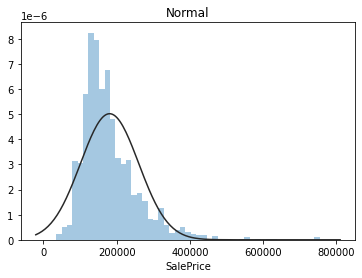

In [10]:
#histogram
plt.figure(2); plt.title('Normal')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.norm)



In [11]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


  Skewness:'SalesPrice' destribution is skewed right
  
  &

  Kurtosis:'SalesPrice' destribution is heavy-tailed

  - These means show 'SalesPrice' destribution is not normal destribution. 

  - Therefore some type of transformation is useful. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

  - The Box-Cox transformation is a useful technique for trying to normalize a data set. In particular, taking the log or square root of a data set is often useful for data that exhibit moderate right skewness.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


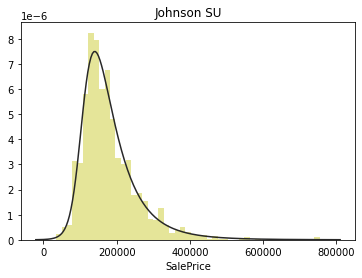

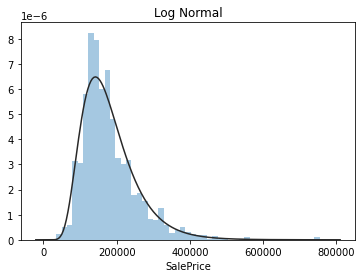

In [12]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.johnsonsu, color="y")
plt.figure(3); plt.title('Log Normal')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.lognorm)
#plt.figure(4); plt.title('Power law')
#sns.distplot(df_train['SalePrice'], kde=False, fit=stats.powerlaw)


**Note**: The log transformation looks good but the unbounded Johnson SU does it better. 

In [13]:
stats.kurtosistest(df_train['SalePrice'], axis=0)  # Gives: z-score: The computed z-score for this test. 
                                                   #        p-value : The 2-sided p-value for the hypothesis test

KurtosistestResult(statistic=14.2626506896832, pvalue=3.7397525079525214e-46)

## Feature Analysis

There are Categorical Variables that are given numerical values in tha data; the numerical values should be converted into strings; so that, they will be recognized as categorical for the following analysis:

- Categorical: MSSubClass

- Ordinal: OverallQual, OverallCond, MoSold (Month Sold: in the data, it has numberical values)

change them to 'object' type for now

In [14]:

print(df_train[['MSSubClass','OverallQual','OverallCond','MoSold'] ].dtypes)
df_train[['MSSubClass','OverallQual','OverallCond','MoSold'] ] = df_train[['MSSubClass','OverallQual','OverallCond','MoSold']].astype('object')
print(df_train[['MSSubClass','OverallQual','OverallCond','MoSold'] ].dtypes)

df_test[['MSSubClass','OverallQual','OverallCond','MoSold'] ] = df_test[['MSSubClass','OverallQual','OverallCond','MoSold']].astype('object')


MSSubClass     int64
OverallQual    int64
OverallCond    int64
MoSold         int64
dtype: object
MSSubClass     object
OverallQual    object
OverallCond    object
MoSold         object
dtype: object


In [15]:
quantitative = [q for q in df_train.columns if df_train.dtypes[q] != 'object' ]
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [q for q in df_train.columns if df_train.dtypes[q] == 'object']

print('Quantitative: ', len(quantitative)) 
print('Categorical: ', len(qualitative),'+ Id & SalePrice') 
print('Total Number of Features: ', len(quantitative)+len(qualitative)+1,'\n')

print('Number of Train Data instances: ', len(df_train))
print('Number of Test Data instances: ', len(df_test))

Quantitative:  32
Categorical:  47 + Id & SalePrice
Total Number of Features:  80 

Number of Train Data instances:  1460
Number of Test Data instances:  1459


              # Null     type
Electrical         1   object
MasVnrType         8   object
MasVnrArea         8  float64
BsmtQual          37   object
BsmtCond          37   object
BsmtFinType1      37   object
BsmtExposure      38   object
BsmtFinType2      38   object
GarageCond        81   object
GarageQual        81   object
GarageFinish      81   object
GarageType        81   object
GarageYrBlt       81  float64
LotFrontage      259  float64
FireplaceQu      690   object
Fence           1179   object
Alley           1369   object
MiscFeature     1406   object
PoolQC          1453   object


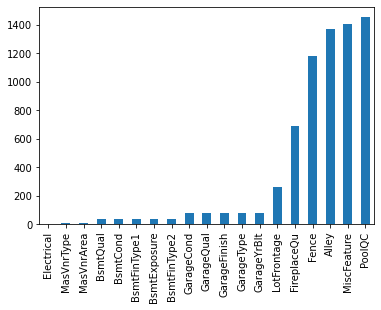

In [16]:
# count of null values in each features in the training data
Null_Values = df_train.isnull().sum()
Null_Values = Null_Values[Null_Values>0]
Null_Values.sort_values(inplace=True)

df_null_train = pd.DataFrame(data={'# Null':Null_Values.values,
                                  'type':df_test.dtypes[Null_Values.index]},
                            index=Null_Values.index)

print(df_null_train)
Null_Values.plot.bar()

**What does Null value mean in each features?**

    .              # Null     Meaning
    Electrical         1 : 
    MasVnrType         8 : None or 0
    MasVnrArea         8 : None or 0
    BsmtQual          37 : No Basement or 0
    BsmtCond          37 : No Basement or 0
    BsmtFinType1      37 : No Basement or 0
    BsmtExposure      38 : No Basement or 0
    BsmtFinType2      38 : No Basement or 0
    GarageCond        81 : No Garage or 0
    GarageQual        81 : No Garage or 0
    GarageFinish      81 : No Garage or 0
    GarageType        81 : No Garage or 0
    GarageYrBlt       81 : No Garage or 0
    LotFrontage      259 : 
    FireplaceQu      690 : No Fireplace or 0
    Fence           1179 : No Fence or 0
    Alley           1369 : No alley access or 0
    MiscFeature     1406 : None or 0
    PoolQC          1453 : No Pool or 0

Therefore, samples with missing values should not be dropped but should be imputed with some other values. Here, the null entries are imputed with 0 for continuous variables and 'MISSING' for categorical variables. This is based on the true meaning/value of null etries as described in the documentaion and as printed above.  

In [17]:
# Count of null values in each features in the test data

Null_Values_test = df_test.isnull().sum()
Null_Values_test = Null_Values_test[Null_Values_test>0]
Null_Values_test.sort_values(inplace=True)
df_null_test = pd.DataFrame(data={'# Null':Null_Values_test.values,
                                  'type':df_test.dtypes[Null_Values_test.index]},
                            index=Null_Values_test.index)
print(df_null_test)


              # Null     type
TotalBsmtSF        1  float64
GarageArea         1  float64
GarageCars         1  float64
KitchenQual        1   object
BsmtUnfSF          1  float64
BsmtFinSF2         1  float64
BsmtFinSF1         1  float64
SaleType           1   object
Exterior1st        1   object
Exterior2nd        1   object
Functional         2   object
Utilities          2   object
BsmtHalfBath       2  float64
BsmtFullBath       2  float64
MSZoning           4   object
MasVnrArea        15  float64
MasVnrType        16   object
BsmtFinType2      42   object
BsmtFinType1      42   object
BsmtQual          44   object
BsmtExposure      44   object
BsmtCond          45   object
GarageType        76   object
GarageFinish      78   object
GarageQual        78   object
GarageCond        78   object
GarageYrBlt       78  float64
LotFrontage      227  float64
FireplaceQu      730   object
Fence           1169   object
Alley           1352   object
MiscFeature     1408   object
PoolQC    

### Test for Normality

**Shapiro-Wilk test for normality** :  if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population).

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [18]:
alpha = 0.01
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] > alpha
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
#print(normal)
print('Is any of the quantitative features normal: ', normal.any())

Is any of the quantitative features normal:  False


In [59]:
## Uncomment the following lines to see plots of distributions for each features 
#f = pd.melt(df_train, value_vars=quantitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")


## Missing Values: Categorical Variables


In [58]:
# Filling the missing values with 'MISSING' for categorical
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING') 


## uncoment the following lines to see the categorical features distribusion
#def boxplot(x, y, **kwargs):
#    sns.boxplot(x=x, y=y)
#    x=plt.xticks(rotation=90)
#f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
#g = g.map(boxplot, "value", "SalePrice")

In [23]:
# Change the 'object' type features into 'categorical' in the test data

test_qualitative = [q for q in df_test.columns if df_test.dtypes[q] == 'object']

df_test[test_qualitative] = df_test[test_qualitative].astype('category')

#df_train.describe(include='int')



In [25]:
#df_train.drop(['MasVnrArea','GarageYrBlt','LotFrontage'],inplace=True, axis=1)

quantitative_new = [ 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

In [26]:
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder 
#data = df_train.loc[:, df_train.columns != 'SalePrice']
#target = df_train['SalePrice']

#train_features = df_train.drop("SalePrice",axis=1)


scale = StandardScaler().fit(df_train[quantitative_new])
scaled = scale.transform(df_train[quantitative_new])

ohe = OneHotEncoder(sparse=False).fit(df_train[qualitative])
encoded = ohe.transform(df_train[qualitative])

train_features = np.hstack((scaled,encoded))



#mct = make_column_transformer((quantitative_new,StandardScaler()),
#                              (qualitative,OneHotEncoder(sparse=False)))
#
#train_trans = mct.fit(train_features).transform(train_features)

#print(len(train_trans.columns))
print(train_features)

[[-0.20714171  1.05099379  0.87866809 ...  0.          1.
   0.        ]
 [-0.09188637  0.15673371 -0.42957697 ...  0.          1.
   0.        ]
 [ 0.07347998  0.9847523   0.83021457 ...  0.          1.
   0.        ]
 ...
 [-0.14781027 -1.00249232  1.02402865 ...  0.          1.
   0.        ]
 [-0.08016039 -0.70440562  0.53949344 ...  0.          1.
   0.        ]
 [-0.05811155 -0.20759447 -0.96256569 ...  0.          1.
   0.        ]]


In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_features,df_train.SalePrice,random_state=42) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2433926690.1278687, tolerance: 664823241.805396
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180110518950.2786, tolerance: 664823241.805396
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189809445980.4695, tolerance: 664823241.805396
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189855950530.2

           Train Score  Test Score  # Features
200.00000     0.901295    0.890728          87
150.00000     0.913959    0.898148          99
100.00000     0.924398    0.901652         121
50.00000      0.933850    0.903012         165
10.00000      0.940939    0.904927         250
1.00000       0.942785    0.901531         298
0.01000       0.942885    0.896225         331
0.00010       0.942885    0.895335         338
0.00001       0.942885    0.895322         339


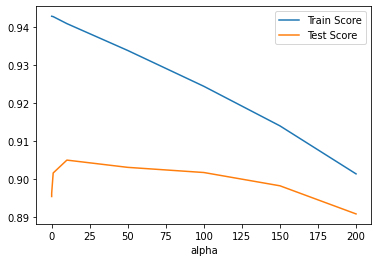

In [54]:
from sklearn.linear_model import Lasso

train_score=[]
test_score=[]
feature_count=[]
alpha = [200,150,100,50,10,1,0.01,0.0001, 0.00001]

for a in alpha:
  lasso = Lasso(alpha = a,random_state=0).fit(x_train,y_train) #alpha = 1
  train_score.append(lasso.score(x_train,y_train))
  test_score.append(lasso.score(x_test,y_test))
  feature_count.append(np.sum(lasso.coef_ !=0))
  
print(pd.DataFrame(data={'Train Score':train_score,'Test Score':test_score, 
                         '# Features':feature_count},
                   index=alpha))
plt.plot(alpha,train_score,label='Train Score')
plt.plot(alpha,test_score,label='Test Score')
plt.xlabel('alpha')
plt.legend()
plt.show()

In [57]:
print('Number of features before encoding: ',len(quantitative_new))
print('Number of features aftter encoding: ',train_features.shape[1])


Number of features before encoding:  29
Number of features aftter encoding:  343


## Result Discussion:
One Hot Encoding increased the number of features from 29 to 343 features. The Lasso model with alpha=10 produced the best test accuracy of 0.904927 (with training accuracy of 0.940939) using only those of 250 features. The trained model has reduced the number of features by 27%. 

